<!-- This should be added to the overrides/main.html and improved-->
<div class="grid cards" markdown>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 488 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M488 261.8C488 403.3 391.1 504 248 504 110.8 504 0 393.2 0 256S110.8 8 248 8c66.8 0 123 24.5 166.3 64.9l-67.5 64.9C258.5 52.6 94.3 116.6 94.3 256c0 86.5 69.1 156.6 153.7 156.6 98.2 0 135-70.4 140.8-106.9H248v-85.3h236.1c2.3 12.7 3.9 24.9 3.9 41.4z"/></svg>
<a href="https://colab.research.google.com/github/AmbiqAI/heartkit/blob/main/docs/guides/train-ecg-segmentation.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    View in Colab
</a>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 496 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M165.9 397.4c0 2-2.3 3.6-5.2 3.6-3.3 .3-5.6-1.3-5.6-3.6 0-2 2.3-3.6 5.2-3.6 3-.3 5.6 1.3 5.6 3.6zm-31.1-4.5c-.7 2 1.3 4.3 4.3 4.9 2.6 1 5.6 0 6.2-2s-1.3-4.3-4.3-5.2c-2.6-.7-5.5 .3-6.2 2.3zm44.2-1.7c-2.9 .7-4.9 2.6-4.6 4.9 .3 2 2.9 3.3 5.9 2.6 2.9-.7 4.9-2.6 4.6-4.6-.3-1.9-3-3.2-5.9-2.9zM244.8 8C106.1 8 0 113.3 0 252c0 110.9 69.8 205.8 169.5 239.2 12.8 2.3 17.3-5.6 17.3-12.1 0-6.2-.3-40.4-.3-61.4 0 0-70 15-84.7-29.8 0 0-11.4-29.1-27.8-36.6 0 0-22.9-15.7 1.6-15.4 0 0 24.9 2 38.6 25.8 21.9 38.6 58.6 27.5 72.9 20.9 2.3-16 8.8-27.1 16-33.7-55.9-6.2-112.3-14.3-112.3-110.5 0-27.5 7.6-41.3 23.6-58.9-2.6-6.5-11.1-33.3 2.6-67.9 20.9-6.5 69 27 69 27 20-5.6 41.5-8.5 62.8-8.5s42.8 2.9 62.8 8.5c0 0 48.1-33.6 69-27 13.7 34.7 5.2 61.4 2.6 67.9 16 17.7 25.8 31.5 25.8 58.9 0 96.5-58.9 104.2-114.8 110.5 9.2 7.9 17 22.9 17 46.4 0 33.7-.3 75.4-.3 83.6 0 6.5 4.6 14.4 17.3 12.1C428.2 457.8 496 362.9 496 252 496 113.3 383.5 8 244.8 8zM97.2 352.9c-1.3 1-1 3.3 .7 5.2 1.6 1.6 3.9 2.3 5.2 1 1.3-1 1-3.3-.7-5.2-1.6-1.6-3.9-2.3-5.2-1zm-10.8-8.1c-.7 1.3 .3 2.9 2.3 3.9 1.6 1 3.6 .7 4.3-.7 .7-1.3-.3-2.9-2.3-3.9-2-.6-3.6-.3-4.3 .7zm32.4 35.6c-1.6 1.3-1 4.3 1.3 6.2 2.3 2.3 5.2 2.6 6.5 1 1.3-1.3 .7-4.3-1.3-6.2-2.2-2.3-5.2-2.6-6.5-1zm-11.4-14.7c-1.6 1-1.6 3.6 0 5.9 1.6 2.3 4.3 3.3 5.6 2.3 1.6-1.3 1.6-3.9 0-6.2-1.4-2.3-4-3.3-5.6-2z"/></svg>
<a href="https://github.com/AmbiqAI/heartkit/blob/main/docs/guides/train-ecg-segmentation.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    GitHub source
</a>

</div>

# Train ECG Segmentation Model

__Date created:__ 2024/07/17 

__Last Modified:__ 2024/07/17 

__Description:__ Train, evaluate, and export 4-stage ECG segmentation model from scratch

## Overview

In this guide, we will train a model to segment an ECG signal into four classes: `NONE`, `PWAVE`, `QRS`, and `TWAVE`. We will use both synthetic and real ECG datasets to train a TCN style model. We will also showcase evaluating and exporting the model for inference via TF Lite and TFLM.

__Input__

- **Sensor**: ECG
- **Location**: Wrist
- **Sampling Rate**: 100 Hz
- **Frame Size**: 2.56 seconds

__Class Mapping__

Segment ECG signal into one of the following classes:

| Base Class       | Target Class | Label        |
| ---------------- | ------------ | ------------ |
| 0-NONE           | 0            | NONE         |
| 1-PWAVE          | 1            | PWAVE        |
| 2-QRS            | 2            | QRS          |
| 3-TWAVE          | 3            | TWAVE        |


__Datasets__

- **[Synthetic](https://ambiqai.github.io/heartkit/datasets/synthetic/)**: Synthetic ECG signals from PhysioKit
- **[LUDB](https://ambiqai.github.io/heartkit/datasets/ludb/)**: Lobachevsky University Electrocardiography database consists of 200 10-second 12-lead records. The boundaries and peaks of P, T waves and QRS complexes were manually annotated by cardiologists. Each record is annotated with the corresponding diagnosis.



In [1]:
#!pip install -q --disable-pip-version-check heartkit

## Setup

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import IPython
import contextlib
from pathlib import Path
import tempfile
import keras
import heartkit as hk
import physiokit as pk
import numpy as np
import neuralspot_edge as nse
import matplotlib.pyplot as plt

In [3]:
# Be sure to set the dataset path to the correct location
datasets_dir = Path(os.getenv("HK_DATASET_PATH", "./datasets"))

plot_theme = hk.utils.dark_theme
nse.utils.silence_tensorflow()
hk.utils.setup_plotting(plot_theme)
logger = nse.utils.setup_logger(__name__)

## Target datasets

The only real-world public dataset containing ECG signals with annotated segments is the [LUDB dataset](https://ambiqai.github.io/heartkit/datasets/ludb/). We will use this dataset to train our model. In addition, we will leverage the synthetic dataset provided by PhysioKit to increase amount of data to train on. We will apply several augmentation techniques to the synthetic dataset to increase the diversity of the data. 



In [4]:
datasets = [
    hk.NamedParams(
        name="ecg-synthetic",
        params=dict(
            num_pts=5000,
            params=dict(
                presets=["SR", "AFIB", "ant_STEMI", "LAHB", "LPHB", "high_take_off", "LBBB", "random_morphology"],
                preset_weights=[8, 4, 1, 1, 1, 1, 1, 0],
                duration=10,
                sample_rate=100,
                heart_rate=[40, 160],
                impedance=[1, 2],
                p_multiplier=[0.7, 1.3],
                t_multiplier=[0.7, 1.3],
                noise_multiplier=[0, 0.01],
                voltage_factor=[800, 1000],
            ),
        ),
    ),
    hk.NamedParams(
        name="ludb",
        params=dict(
            path=datasets_dir / "ludb",
        ),
    ),
]

## Target classes

For this task, we are going to delineate ECG signals into one of four classes: 

* __None__: Background signal
* __P-Wave__: Atrial depolarization
* __QRS__: Ventricular depolarization
* __T-Wave__: Ventricular repolarization

HeartKit already provides a number of heart segments. We will provide a class mapping for the four classes we are interested in. We will also provide class names for display purposes.

In [5]:
class_map = {
    hk.tasks.HKSegment.normal: 0,
    hk.tasks.HKSegment.pwave: 1,
    hk.tasks.HKSegment.qrs: 2,
    hk.tasks.HKSegment.twave: 3,
    hk.tasks.HKSegment.uwave: 0,
    hk.tasks.HKSegment.noise: 0,
}

class_names = ["NONE", "P-WAVE", "QRS", "T-WAVE"]

## Define TCN model architecture

For this task, we are going to leverage a customized __TCN__ model architecture that is smaller and can handle 1D signals. The model consists of 4 TCN blocks with a depth of 1. Each block leverages dilated depthwise-separable convolutions along with inverted expansion and squeeze and excitation layers. The model is followed by a 1D convolutional layer and a final dense layer for regression. Unlike vision tasks, we leverage larger kernel sizes and strides to capture temporal dependencies in the ECG signal.

In [6]:
architecture = hk.NamedParams(
    name="tcn",
    params=dict(
        input_kernel=(1, 7),
        input_norm="batch",
        blocks=[
            dict(
                depth=1,
                branch=1,
                filters=16,
                kernel=(1, 7),
                dilation=(1, 1),
                dropout=0.1,
                ex_ratio=1,
                se_ratio=0,
                norm="batch",
            ),
            dict(
                depth=1,
                branch=1,
                filters=24,
                kernel=(1, 7),
                dilation=(1, 2),
                dropout=0.1,
                ex_ratio=1,
                se_ratio=2,
                norm="batch",
            ),
            dict(
                depth=1,
                branch=1,
                filters=32,
                kernel=(1, 7),
                dilation=(1, 4),
                dropout=0.1,
                ex_ratio=1,
                se_ratio=2,
                norm="batch",
            ),
            dict(
                depth=1,
                branch=1,
                filters=48,
                kernel=(1, 7),
                dilation=(1, 8),
                dropout=0.1,
                ex_ratio=1,
                se_ratio=2,
                norm="batch",
            ),
        ],
        output_kernel=(1, 7),
        include_top=True,
        use_logits=True,
        model_name="tcn",
    ),
)

## Preprocess pipeline

We will preprocess the ECG signals by applying the following steps:
* Apply bandpass filter with cutoff frequencies of 1Hz and 30Hz
* Apply Z-score normalization w/ epsilon to avoid division by zero

The task accepts a list of preprocessing functions that will be applied to the input data. 

In [7]:
preprocesses = [hk.NamedParams(name="layer_norm", params=dict(epsilon=0.01, name="znorm"))]

## Augmentation pipeline

We will apply the following augmentations to the ECG signals:
* Baseline wander: Simulate baseline wander by adding a random frequency sinusoidal signal to the ECG signal
* Powerline noise: Simulate powerline noise by adding a 50 Hz sinusoidal signal to the ECG signal
* Burst noise: Simulate burst noise by randomly injecting burst of high frequency noise to the ECG signal
* Noise sources: Apply several noises at given frequencies to the ECG signal
* Lead noise: Simulate lead noise by adding a random frequency sinusoidal signal to the ECG signal
* NSTDB: Add real noise captured from NSTDB dataset to the ECG signal. 


In [8]:
augmentations = [
    hk.NamedParams(
        name="random_noise_distortion", params=dict(amplitude=[0, 0.5], frequency=[0.5, 1.5], name="baseline_wander")
    ),
    hk.NamedParams(
        name="random_sine_wave",
        params=dict(amplitude=[0, 0.05], frequency=[45, 50], auto_vectorize=False, name="powerline_noise"),
    ),
    hk.NamedParams(
        name="amplitude_warp", params=dict(amplitude=[0.9, 1.1], frequency=[0.5, 1.5], name="amplitude_warp")
    ),
    hk.NamedParams(name="random_noise", params=dict(factor=[0, 0.025], name="random_noise")),
    hk.NamedParams(name="random_background_noise", params=dict(amplitude=[0, 0.025], num_noises=1, name="nstdb")),
]

## Task configuration

Here we provide the complete configuration for the task. This includes the dataset configuration, preprocessing pipeline, model architecture, and training parameters.

In [9]:
params = hk.HKTaskParams(
    # Common arguments
    name="hk-ecg-segmentation",
    job_dir=Path(tempfile.gettempdir()) / "hk-ecg-segmentation",
    # Dataset arguments
    datasets=datasets,
    # Signal arguments
    sampling_rate=100,
    frame_size=256,
    # Dataloader arguments
    samples_per_patient=25,
    val_samples_per_patient=10,
    test_samples_per_patient=10,
    # Preprocessing/Augmentation arguments
    preprocesses=preprocesses,
    augmentations=augmentations,
    # Class arguments
    num_classes=len(class_names),
    class_map=class_map,
    class_names=class_names,
    # Split arguments
    val_patients=0.1,
    val_size=20000,
    test_size=20000,
    val_file="val.pkl",
    test_file="val.pkl",
    # Model arguments
    model_file="model.keras",
    architecture=architecture,
    # Training parameters
    lr_rate=1e-3,
    lr_cycles=1,
    batch_size=256,
    buffer_size=50000,
    epochs=100,
    steps_per_epoch=50,
    val_metric="loss",
    class_weights="balanced",
    # Evaluation arguments
    threshold=0.5,
    val_metric_threshold=0.98,
    # Export parameters
    tflm_var_name="ecg_rhythm_flatbuffer",
    tflm_file="ecg_rhythm_flatbuffer.h",
    # Demo params
    backend="pc",
    demo_size=800,
    display_report=False,
    # Extra arguments
    verbose=1,
    seed=42,
)

## Load segmentation task 

HeartKit provides a __TaskFactory__ that includes a number ready-to-use tasks. Each task provides methods for training, evaluating, exporting, and demoing. We will grab the __segmentation__ task and configure it for our use case.

In [10]:
task = hk.TaskFactory.get("segmentation")

## Download the datasets

We will download the synthetic and LUDB datasets using the `heartkit` library. If already downloaded, this step will be skipped.

In [11]:
task.download(params=params)

## Visualize the data

Let's visualize a sample ECG signal from the synthetic dataset. Note this contains no noise or artifacts. Augmentations will be applied later to generate noisy samples for training.

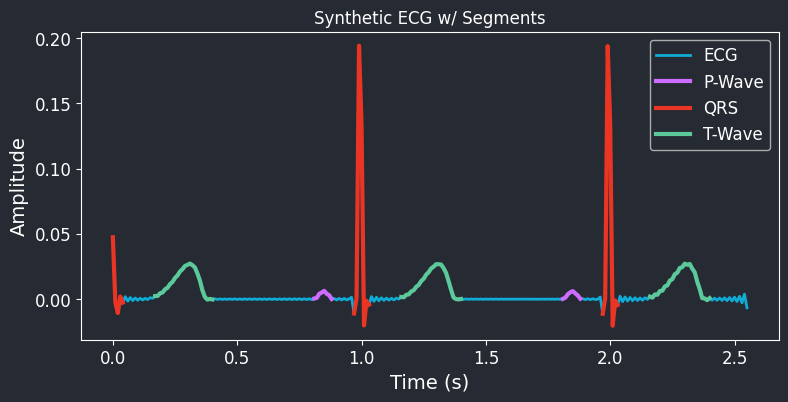

In [12]:
ecg, segs, fids = pk.ecg.synthesize(
    signal_length=params.frame_size,
    sample_rate=params.sampling_rate,
    heart_rate=60,
    leads=1,
    preset=pk.ecg.EcgPreset.SR,
    noise_multiplier=0.0,
)
ecg = ecg.squeeze()
segs = segs.squeeze()
pwaves = np.where(segs == hk.tasks.HKSegment.pwave, ecg, np.nan)
qrs = np.where(segs == hk.tasks.HKSegment.qrs, ecg, np.nan)
twaves = np.where(segs == hk.tasks.HKSegment.twave, ecg, np.nan)


ts = np.arange(0, len(ecg)) / params.sampling_rate
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
plt.plot(ts, ecg, color=plot_theme.primary_color, lw=2, label="ECG")
plt.plot(ts, pwaves, color=plot_theme.secondary_color, lw=3, label="P-Wave")
plt.plot(ts, qrs, color=plot_theme.tertiary_color, lw=3, label="QRS")
plt.plot(ts, twaves, color=plot_theme.quaternary_color, lw=3, label="T-Wave")
plt.legend()

# Plot segments
plt.title("Synthetic ECG w/ Segments")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
plt.show()

## Visualize the augmentations

Taking the existing synthetic ECG signal, let's look at the effects of the augmentations on the signal.

In [13]:
augmenter = hk.datasets.create_augmentation_pipeline(
    augmentations=params.augmentations,
    sampling_rate=params.sampling_rate,
)

I0000 00:00:1723838702.560559  758191 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723838702.580638  758191 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723838702.580743  758191 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723838702.581841  758191 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

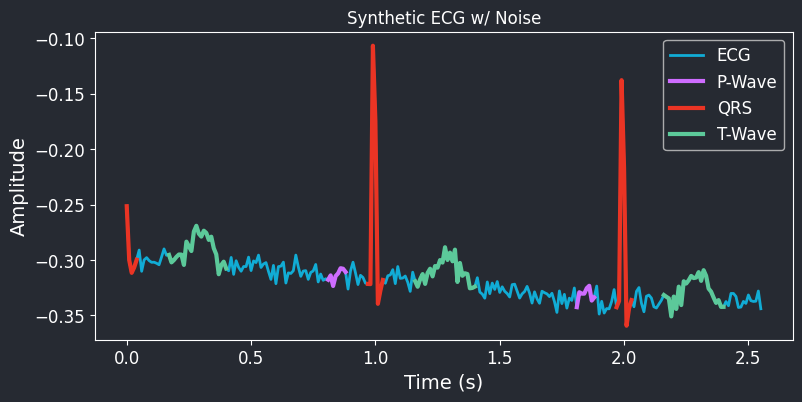

In [23]:
ecg_noise = augmenter(ecg.reshape(-1, 1)).numpy().squeeze()

pwaves = np.where(segs == hk.tasks.HKSegment.pwave, ecg_noise, np.nan)
qrs = np.where(segs == hk.tasks.HKSegment.qrs, ecg_noise, np.nan)
twaves = np.where(segs == hk.tasks.HKSegment.twave, ecg_noise, np.nan)

ts = np.arange(0, len(ecg_noise)) / params.sampling_rate
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
plt.plot(ts, ecg_noise, color=plot_theme.primary_color, lw=2, label="ECG")
plt.plot(ts, pwaves, color=plot_theme.secondary_color, lw=3, label="P-Wave")
plt.plot(ts, qrs, color=plot_theme.tertiary_color, lw=3, label="QRS")
plt.plot(ts, twaves, color=plot_theme.quaternary_color, lw=3, label="T-Wave")
plt.legend()

# Plot segments
plt.title("Synthetic ECG w/ Noise")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
plt.show()

## Visualize the model

Lets quickly instantiate and visualize the model.

In [15]:
model = nse.models.tcn.tcn_from_object(
    x=keras.Input(shape=(params.frame_size, 1), name="inputs"), params=architecture.params, num_classes=len(class_names)
)
model.summary(layer_range=("inputs", model.layers[10].name))

Model: "TCN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 256, 1)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 256, 1) │          0 │ inputs[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ENC.CN              │ (None, 1, 256, 1) │          7 │ reshape[0][0]     │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ENC.BN              │ (None, 1, 256, 1) │          4 │ ENC.CN[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.B1.CN      │ (None, 1, 256, 1) │          7 │ ENC.BN[0][0]      │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.B1.BN      │ (None, 1, 256, 1) │          4 │ B1.D1.DW.B1.CN[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.ACT        │ (None, 1, 256, 1) │          0 │ B1.D1.DW.B1.BN[0… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.B1.CN      │ (None, 1, 256,    │         16 │ B1.D1.DW.ACT[0][… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.B1.BN      │ (None, 1, 256,    │         64 │ B1.D1.PW.B1.CN[0… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.ACT        │ (None, 1, 256,    │          0 │ B1.D1.PW.B1.BN[0… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.DROP             │ (None, 1, 256,    │          0 │ B1.D1.PW.ACT[0][… │
│ (SpatialDropout2D)  │ 16)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,310 (28.55 KB)

 Trainable params: 6,922 (27.04 KB)

 Non-trainable params: 388 (1.52 KB)

## Train the model

Using the task configuration, we will train the model on the synthetic and LUDB datasets. We will also apply augmentations to the synthetic dataset to increase the diversity of the data.

INFO     Creating synthetic dataset cache with 5000 patients                                   ]8;id=172088;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py\ecg_synthetic.py]8;;\:]8;id=461477;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py#159\159]8;;\

Building ecg-synthetic cache: 100%|██████████| 5000/5000 [00:56<00:00, 87.92it/s] 


INFO     Validation steps per epoch: 78                                                             ]8;id=284434;file:///workspaces/heartkit/heartkit/tasks/segmentation/datasets.py\datasets.py]8;;\:]8;id=866120;file:///workspaces/heartkit/heartkit/tasks/segmentation/datasets.py#107\107]8;;\

Training:   0%|           0/100 ETA: ?s,  ?epochs/sWARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1723838774.747244  758430 service.cc:146] XLA service 0x7b7988001e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723838774.747268  758430 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
I0000 00:00:1723838783.452909  758430 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Training: 100%|██████████ 100/100 ETA: 00:00s,   1.96s/epochs


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8512 - f1: 0.8524 - loss: 0.1304


INFO     [VAL SET] ACC=0.8510, F1=0.8522, LOSS=0.1312                                                  ]8;id=904348;file:///workspaces/heartkit/heartkit/tasks/segmentation/train.py\train.py]8;;\:]8;id=191133;file:///workspaces/heartkit/heartkit/tasks/segmentation/train.py#184\184]8;;\

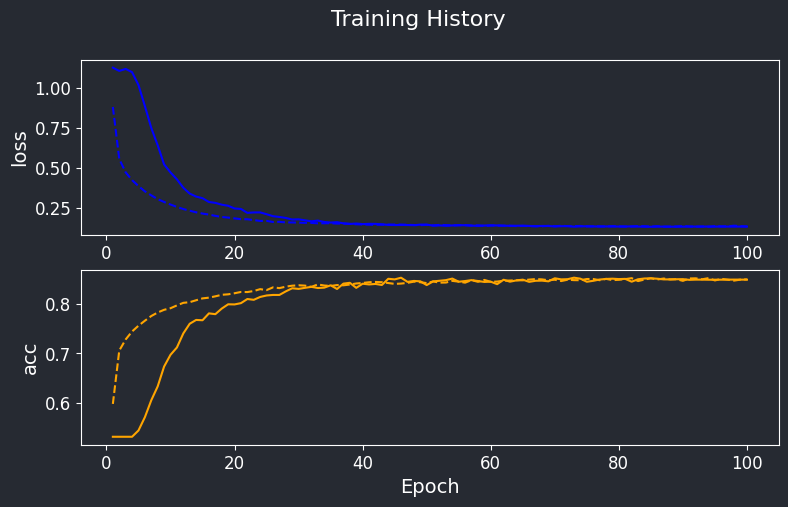

In [16]:
task.train(params)

## Model evaluation

Now that we have trained the model, we will evaluate the model on the test dataset. Similar to training, we will provide the high-level configuration to the task process.

In [17]:
task.evaluate(params)

INFO     Creating synthetic dataset cache with 5000 patients                                   ]8;id=288389;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py\ecg_synthetic.py]8;;\:]8;id=256787;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py#159\159]8;;\

Building ecg-synthetic cache: 100%|██████████| 5000/5000 [00:57<00:00, 87.27it/s] 


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - acc: 0.8674 - f1: 0.8687 - loss: 0.1110


INFO     [TEST SET] ACC=0.8652, F1=0.8665, LOSS=0.1141                                               ]8;id=630320;file:///workspaces/heartkit/heartkit/tasks/segmentation/evaluate.py\evaluate.py]8;;\:]8;id=347514;file:///workspaces/heartkit/heartkit/tasks/segmentation/evaluate.py#47\47]8;;\

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Confusion matrix

Let's visualize the confusion matrix to understand the model's performance on each class.

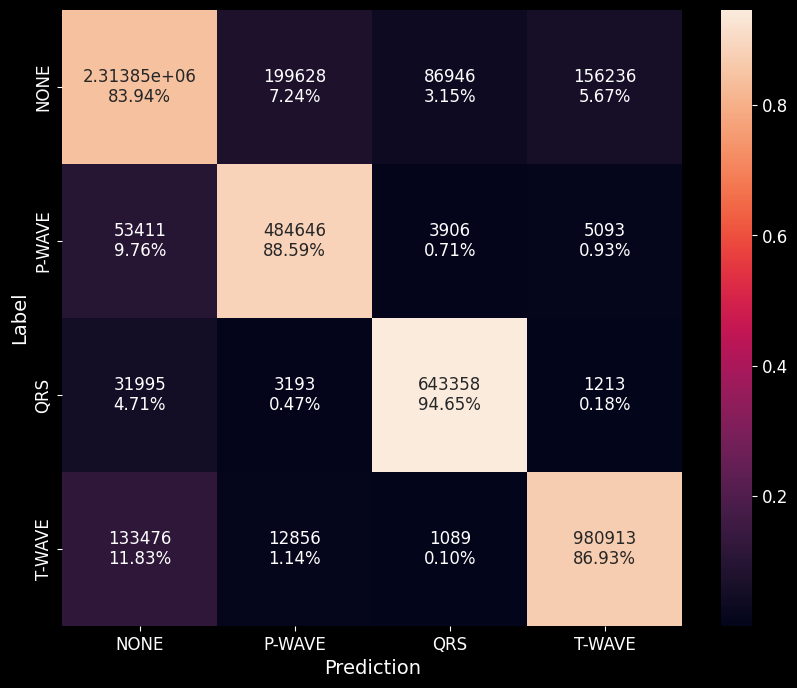

In [18]:
IPython.display.Image(filename=params.job_dir / "confusion_matrix_test.png", width=500)

## Export model to TF Lite / TFLM


Once we have trained and evaluated the model, we need to export the model into a format that can be used for inference on the edge. Currently, we export the model to TensorFlow Lite flatbuffer format. This will also generate a C header file that can be used with TensorFlow Lite for Microcontrollers (TFLM).


### Post-Training Quantization (PTQ)

For running on bare metal, we will perform post-training quantization to convert the model to an 8-bit integer model. The weights and activations will be quantized to 8-bits and biases will be quantized to 32-bits. This will reduce the model size and improve the inference speed.

In [19]:
quantization = hk.QuantizationParams(
    enabled=True,
    format="INT8",
    io_type="int8",
    conversion="CONCRETE",
)
params.quantization = quantization

In [20]:
# TF dumps a lot of info to stdout, so we redirect it to /dev/null
with open(os.devnull, "w") as devnull:
    with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
        task.export(params)

INFO     Creating synthetic dataset cache with 5000 patients                                   ]8;id=878050;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py\ecg_synthetic.py]8;;\:]8;id=80552;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py#159\159]8;;\

[08/16/24 20:11:32] WARNING  WARNING:absl:Please consider providing the trackable_obj argument in the  ]8;id=858712;file:///workspaces/heartkit/.venv/lib/python3.12/site-packages/tensorflow/lite/python/lite.py\lite.py]8;;\:]8;id=480914;file:///workspaces/heartkit/.venv/lib/python3.12/site-packages/tensorflow/lite/python/lite.py#2166\2166]8;;\
                             from_concrete_functions. Providing without the trackable_obj argument is              
                             deprecated and it will use the deprecated conversion path.                            

I0000 00:00:1723839092.566023  758191 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723839092.566111  758191 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1723839092.566407  758191 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723839092.566464  758191 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing

INFO     [TF METRICS] LOSS=0.4022 ACC=0.8683 F1=0.8694 IOU=0.7551                                     ]8;id=339944;file:///workspaces/heartkit/heartkit/tasks/segmentation/export.py\export.py]8;;\:]8;id=960343;file:///workspaces/heartkit/heartkit/tasks/segmentation/export.py#105\105]8;;\

INFO     [TFL METRICS] LOSS=0.4077 ACC=0.8686 F1=0.8676 IOU=0.7529                                    ]8;id=861404;file:///workspaces/heartkit/heartkit/tasks/segmentation/export.py\export.py]8;;\:]8;id=138484;file:///workspaces/heartkit/heartkit/tasks/segmentation/export.py#106\106]8;;\

INFO     Validation passed (0.0055)                                                                   ]8;id=743127;file:///workspaces/heartkit/heartkit/tasks/segmentation/export.py\export.py]8;;\:]8;id=94135;file:///workspaces/heartkit/heartkit/tasks/segmentation/export.py#114\114]8;;\

## Run inference demo

We will run a demo on the PC to verify that the model is working as expected. The demo will load the model and run inferences across a randomly selected ECG signal. The demo will also provide the model's prediction and the corresponding class name. 

Inference: 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]


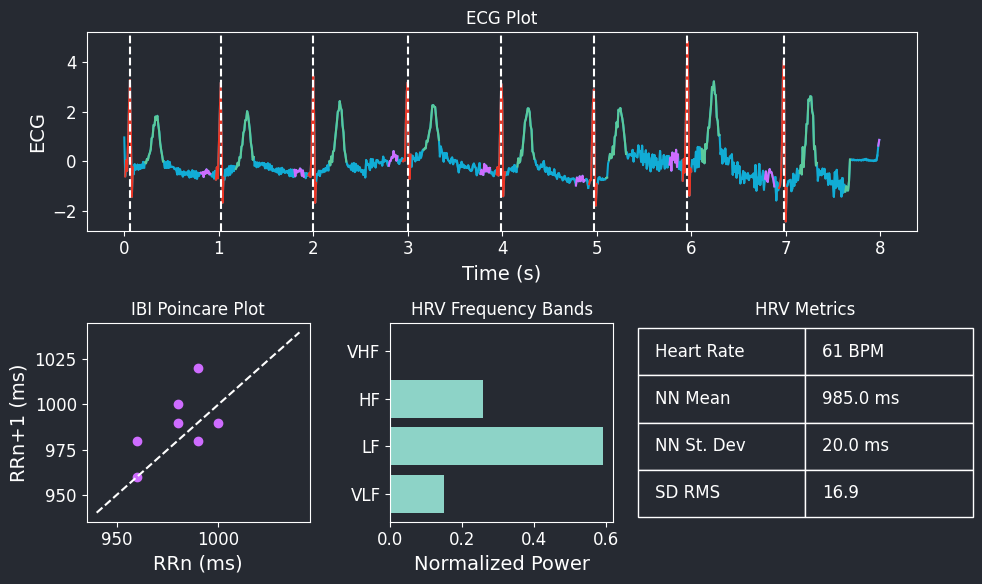

In [14]:
task.demo(params=params)